# Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
from pathlib import Path
from datetime import datetime, timedelta
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tyesondemets/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(
    q='bitcoin' or 'btc',
    language='en',
    page_size=100,
    sort_by='relevancy'
)

In [5]:
#Display articles
btc_news

{'status': 'ok',
 'totalResults': 8213,
 'articles': [{'source': {'id': None, 'name': 'Lifehacker.com'},
   'author': 'Jeff Somers',
   'title': 'Is the Crypto Bubble Going to Burst?',
   'description': 'Even if you aren’t paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 trillion last year to about $1.5 trillion in a matter of days…',
   'url': 'https://lifehacker.com/is-the-crypto-bubble-going-to-burst-1848475768',
   'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/976a59b09e0e681e692bd7517498e3f2.jpg',
   'publishedAt': '2022-02-09T16:00:00Z',
   'content': 'Even if you arent paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 tr… [+4782 chars]'},
  {'sou

In [6]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(
    q='ethereum' or 'eth',
    language='en',
    page_size=100,
    sort_by='relevancy'
)

In [7]:
#Display articles
eth_news

{'status': 'ok',
 'totalResults': 3881,
 'articles': [{'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Corin Faife',
   'title': 'Crypto.com admits over $30 million stolen by hackers',
   'description': 'Cryptocurrency exchange Crypto.com has said that $15 million in ethereum and $18 million in bitcoin were stolen by hackers in a security breach',
   'url': 'https://www.theverge.com/2022/1/20/22892958/crypto-com-exchange-hack-bitcoin-ethereum-security',
   'urlToImage': 'https://cdn.vox-cdn.com/thumbor/mde_l3lUC4muDPEFG7LYrUz0O3g=/0x146:2040x1214/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/8921023/acastro_bitcoin_2.jpg',
   'publishedAt': '2022-01-20T13:23:31Z',
   'content': 'In a new blog post the company said that 4,836 ETH and 443 bitcoin were taken\r\nIllustration by Alex Castro / The Verge\r\nIn a blog post published in the early hours of Thursday morning, cryptocurrency… [+2004 chars]'},
  {'source': {'id': None, 'name': 'Gizmodo.com'},
   'author

In [8]:
def create_df(news):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [9]:
btc_df = create_df(btc_news['articles'])
eth_df = create_df(eth_news['articles'])

In [10]:
btc_df.head()

,title,description,text,date
0,Is the Crypto Bubble Going to Burst?,Even if you aren’t paying attention to Bitcoin...,Even if you arent paying attention to Bitcoin ...,2022-02-09T16:00:00Z
1,"As Kazakhstan Descends into Chaos, Crypto Mine...",The central Asian country became No. 2 in the ...,When Denis Rusinovich set up cryptocurrency mi...,2022-01-12T12:00:00Z
2,The International Monetary Fund tells El Salva...,The International Monetary Fund’s executive di...,El Salvador introduced Bitcoin as a legal tend...,2022-01-25T22:11:14Z
3,Jack Dorsey’s Block is working to make Bitcoin...,Block is working on building an “open Bitcoin ...,Were officially building an open Bitcoin minin...,2022-01-14T13:46:28Z
4,DeepDotWeb operator sentenced to eight years f...,"The operator of DeepDotWeb, a site that indexe...",Israeli national Tal Prihar pled guilty to rou...,2022-01-27T18:16:57Z


In [11]:
eth_df.head()

,title,description,text,date
0,Crypto.com admits over $30 million stolen by h...,Cryptocurrency exchange Crypto.com has said th...,"In a new blog post the company said that 4,836...",2022-01-20T13:23:31Z
1,Hackers Launder $15 Million Stolen From Crypto...,Hackers who made off with roughly $15 million ...,Hackers who made off with roughly $15 million ...,2022-01-19T12:00:00Z
2,Eric Adams Is Taking His First Paycheck in Crypto,"Mr. Adams, who wants New York City to become t...","On some level, the new mayor is simply employi...",2022-01-20T19:54:48Z
3,Robinhood opens cryptocurrency wallet to beta ...,"Back in September\r\n, Robinhood announced pla...","Back in September\r\n, Robinhood announced pla...",2022-01-21T22:57:21Z
4,Public Blockchains Are the New National Econom...,The “fiscal” and “monetary” policy tools of sm...,This enables an L1 platform to bootstrap its n...,2022-02-09T12:00:00Z


In [12]:
eth_df.shape

(100, 4)

In [13]:
#Save to CSV
# file_path = Path("Resources/btc_headlines.csv")
# btc_df.to_csv(file_path, index=False, encoding='utf-8-sig')

In [14]:
#Save to CSV
# file_path = Path("Resources/eth_headlines.csv")
# eth_df.to_csv(file_path, index=False, encoding='utf-8-sig')

In [15]:
# Sentiment score function
# def get_sentiment(score):
#     """
#     Calculates the sentiment based on the compound score.
#     """
#     result = 0  # Neutral by default
#     if score >= 0.05:  # Positive
#         result = 1
#     elif score <= -0.05:  # Negative
#         result = -1

#     return result

In [16]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_news['articles']:
    try:
        text = article["content"]
        date = article["publishedAt"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
    except AttributeError:
        pass
# Create DataFrame
btc_sentiments_df = pd.DataFrame(btc_sentiments)

#Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_sentiments_df = btc_sentiments_df[cols]

btc_sentiments_df.head()

,date,text,compound,positive,negative,neutral
0,2022-02-09T16:00:00Z,Even if you arent paying attention to Bitcoin ...,0.5859,0.124,0.000,0.876
1,2022-01-12T12:00:00Z,When Denis Rusinovich set up cryptocurrency mi...,0.0000,0.000,0.000,1.000
2,2022-01-25T22:11:14Z,El Salvador introduced Bitcoin as a legal tend...,0.3182,0.105,0.000,0.895
3,2022-01-14T13:46:28Z,Were officially building an open Bitcoin minin...,-0.4404,0.000,0.083,0.917
4,2022-01-27T18:16:57Z,Israeli national Tal Prihar pled guilty to rou...,-0.3182,0.045,0.084,0.871


In [17]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_news['articles']:
    try:
        text = article["content"]
        date = article["publishedAt"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
    except AttributeError:
        pass
# Create DataFrame
eth_sentiments_df = pd.DataFrame(eth_sentiments)

#Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_sentiments_df = eth_sentiments_df[cols]

eth_sentiments_df.head()

,date,text,compound,positive,negative,neutral
0,2022-01-20T13:23:31Z,"In a new blog post the company said that 4,836...",0.0000,0.000,0.0,1.000
1,2022-01-19T12:00:00Z,Hackers who made off with roughly $15 million ...,0.0000,0.000,0.0,1.000
2,2022-01-20T19:54:48Z,"On some level, the new mayor is simply employi...",0.1779,0.052,0.0,0.948
3,2022-01-21T22:57:21Z,"Back in September\r\n, Robinhood announced pla...",0.0772,0.038,0.0,0.962
4,2022-02-09T12:00:00Z,This enables an L1 platform to bootstrap its n...,0.0000,0.000,0.0,1.000


In [18]:
# Describe the Bitcoin Sentiment
btc_sentiments_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.065318,0.069560,0.049260,0.881150
std,0.424049,0.061581,0.066204,0.086587
min,-0.862200,0.000000,0.000000,0.662000
25%,-0.296000,0.000000,0.000000,0.834000
50%,0.025800,0.068500,0.000000,0.893500
75%,0.391725,0.111250,0.088000,0.937250
max,0.834100,0.234000,0.266000,1.000000


In [19]:
# Describe the Ethereum Sentiment
eth_sentiments_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.230110,0.078690,0.021940,0.899380
std,0.371454,0.074271,0.040947,0.081084
min,-0.709600,0.000000,0.000000,0.716000
25%,0.000000,0.000000,0.000000,0.844250
50%,0.177900,0.068500,0.000000,0.908000
75%,0.536525,0.129250,0.045250,0.974500
max,0.880700,0.265000,0.174000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [20]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [21]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [22]:
# # Complete the tokenizer function
# def tokenizer(text):
#     """Tokenizes text."""
    
#     # Remove the punctuation from text

   
#     # Create a tokenized list of the words
    
    
#     # Lemmatize words into root words

   
#     # Convert the words to lowercase
    
    
#     # Remove the stop words
    
    
#     return tokens

In [23]:
def tokenizer (article):
    # Define a set of stopwords using `stopwords.words()`
    sw = set(stopwords.words('english'))
    #Create custom stopwords
    sw_addons = {'said', 'today', 'week'}
    # Define the regex parameters
    regex = re.compile("[^a-zA-Z ]")
    # Apply regex parameters to article
    re_clean = regex.sub('', article)
    # Apply `word_tokenize` to the regex scrubbed text
    re_words = word_tokenize(re_clean)
    #Apply lemmatizer
    lem = [lemmatizer.lemmatize(word) for word in re_words]
    # Create list of lower-case words that are not in the stopword set
    tokens = [word.lower() for word in re_words if word.lower() not in sw.union(sw_addons)]
    # Return the final list
    return tokens

In [24]:
#' '.join(btc_sentiments_df['text'])

In [25]:
#btc_string = btc_sentiments_df['text'].to_string()



In [27]:
# Create a new tokens column for Bitcoin
btc_big_string = ' '.join(btc_sentiments_df['text'].tolist())
btc_tokens = pd.DataFrame(tokenizer(btc_big_string))
btc_tokens.columns = ['BTC_Tokens']
btc_tokens

,BTC_Tokens
0,even
1,arent
2,paying
3,attention
4,bitcoin
...,...
2011,men
2012,paid
2013,sex
2014,undera


In [28]:
# Create a new tokens column for Ethereum
eth_big_string = ' '.join(eth_sentiments_df['text'].tolist())
eth_tokens = pd.DataFrame(tokenizer(eth_big_string))
eth_tokens.columns = ['ETH_Tokens']
eth_tokens

,ETH_Tokens
0,new
1,blog
2,post
3,company
4,eth
...,...
1922,treasury
1923,yields
1924,jumped
1925,inves


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [31]:
from collections import Counter
from nltk import ngrams

In [33]:
# Generate the Bitcoin N-grams where N=2
btc_tokenized = tokenizer(btc_big_string)
btc_bigrams = Counter(ngrams(btc_tokenized, n=2))
print(dict(btc_bigrams))

{('even', 'arent'): 1, ('arent', 'paying'): 1, ('paying', 'attention'): 1, ('attention', 'bitcoin'): 1, ('bitcoin', 'cryptocurrencies'): 1, ('cryptocurrencies', 'might'): 1, ('might', 'noticed'): 1, ('noticed', 'value'): 1, ('value', 'plummeted'): 1, ('plummeted', 'last'): 1, ('last', 'total'): 1, ('total', 'value'): 1, ('value', 'market'): 1, ('market', 'tumbling'): 1, ('tumbling', 'high'): 1, ('high', 'tr'): 1, ('tr', 'chars'): 1, ('chars', 'denis'): 1, ('denis', 'rusinovich'): 1, ('rusinovich', 'set'): 1, ('set', 'cryptocurrency'): 1, ('cryptocurrency', 'mining'): 1, ('mining', 'company'): 1, ('company', 'maveric'): 1, ('maveric', 'group'): 1, ('group', 'kazakhstan'): 1, ('kazakhstan', 'thought'): 1, ('thought', 'hit'): 1, ('hit', 'jackpot'): 1, ('jackpot', 'next'): 1, ('next', 'door'): 1, ('door', 'china'): 1, ('china', 'russia'): 1, ('russia', 'country'): 1, ('country', 'everything'): 1, ('everything', 'bitcoin'): 1, ('bitcoin', 'chars'): 4, ('chars', 'el'): 2, ('el', 'salvador'):

In [34]:
# Generate the Ethereum N-grams where N=2
eth_tokenized = tokenizer(eth_big_string)
eth_bigrams = Counter(ngrams(eth_tokenized, n=2))
print(dict(eth_bigrams))

{('new', 'blog'): 2, ('blog', 'post'): 3, ('post', 'company'): 2, ('company', 'eth'): 1, ('eth', 'bitcoin'): 1, ('bitcoin', 'takenillustration'): 1, ('takenillustration', 'alex'): 1, ('alex', 'castro'): 1, ('castro', 'vergein'): 1, ('vergein', 'blog'): 1, ('post', 'published'): 1, ('published', 'early'): 1, ('early', 'hours'): 1, ('hours', 'thursday'): 1, ('thursday', 'morning'): 1, ('morning', 'cryptocurrency'): 1, ('cryptocurrency', 'chars'): 1, ('chars', 'hackers'): 1, ('hackers', 'made'): 1, ('made', 'roughly'): 1, ('roughly', 'million'): 1, ('million', 'ethereum'): 2, ('ethereum', 'cryptocom'): 1, ('cryptocom', 'attempting'): 1, ('attempting', 'launder'): 1, ('launder', 'funds'): 1, ('funds', 'socalled'): 1, ('socalled', 'ethereum'): 1, ('ethereum', 'mixer'): 1, ('mixer', 'known'): 1, ('known', 'tornado'): 1, ('tornado', 'cash'): 1, ('cash', 'according'): 1, ('according', 'new'): 2, ('new', 'report'): 2, ('report', 'chars'): 1, ('chars', 'level'): 1, ('level', 'new'): 1, ('new', '

In [35]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [36]:
# Use token_count to get the top 10 words for Bitcoin
print(token_count(btc_tokenized))

[('chars', 99), ('bitcoin', 65), ('cryptocurrency', 33), ('reuters', 33), ('new', 21), ('jan', 18), ('us', 14), ('last', 12), ('digital', 12), ('york', 12)]


In [37]:
# Use token_count to get the top 10 words for Ethereum
print(token_count(eth_tokenized))

[('chars', 96), ('cryptocurrency', 30), ('ethereum', 24), ('bitcoin', 22), ('new', 20), ('digital', 15), ('reuters', 13), ('million', 11), ('blockchain', 11), ('crypto', 11)]


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

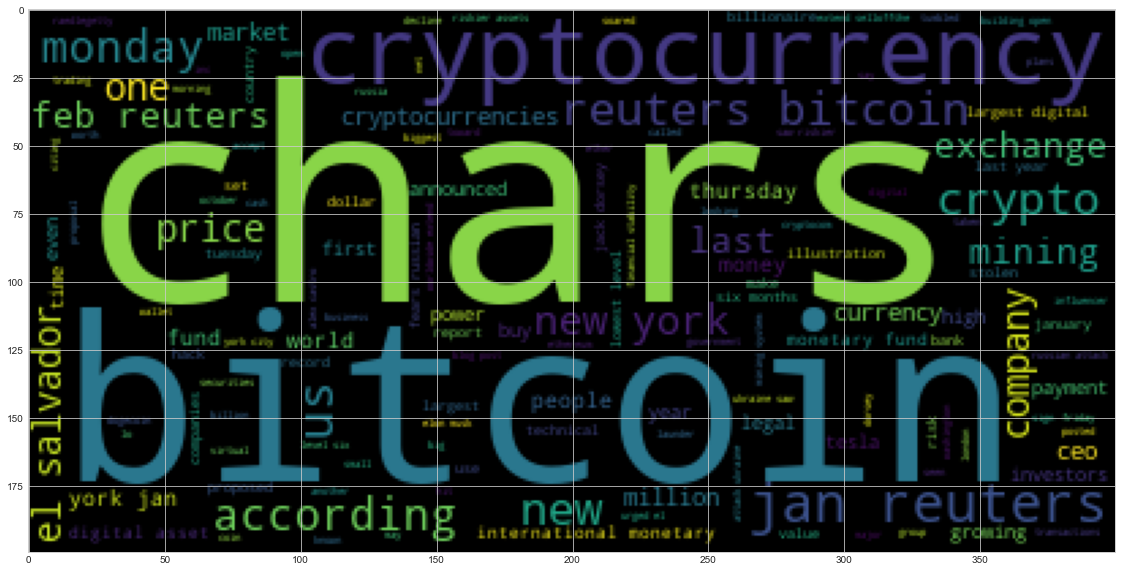

In [52]:
# Generate the Bitcoin word cloud
btc_tokenized_string = ' '.join(map(str,btc_tokenized))
btc_wc = WordCloud().generate(btc_tokenized_string)
plt.imshow(btc_wc)

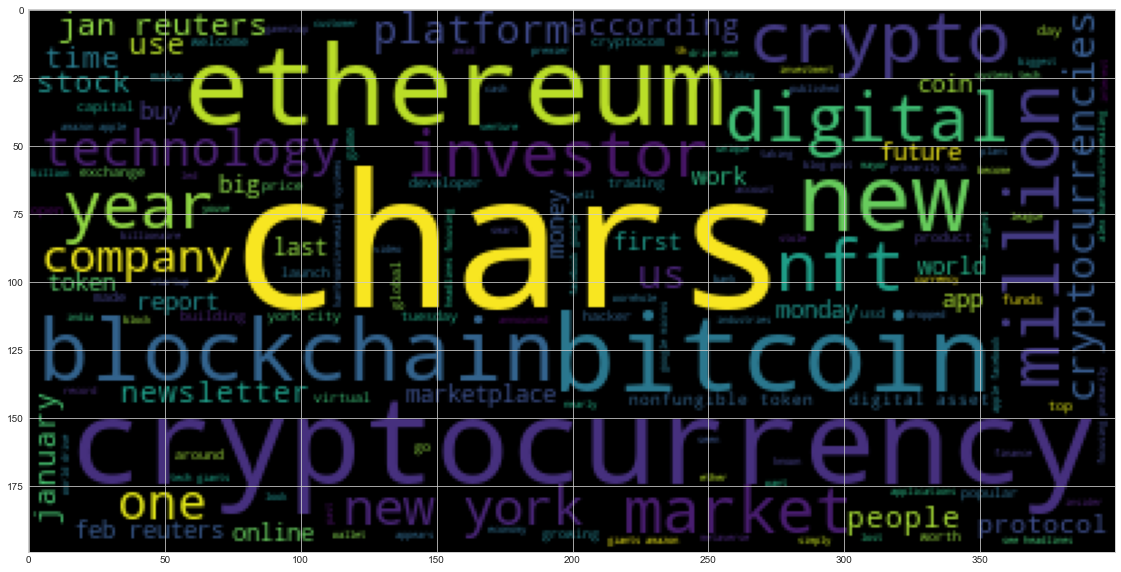

In [53]:
# Generate the Ethereum word cloud
eth_tokenized_string = ' '.join(map(str,eth_tokenized))
eth_wc = WordCloud().generate(eth_tokenized_string)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [54]:
import spacy
from spacy import displacy

In [79]:
# Download the language model for SpaCy
#!python -m spacy download en_core_web_lg

     |████████████████████████████████| 777.4 MB 4.7 kB/s  eta 0:00:01  |                                | 624 kB 2.6 MB/s eta 0:05:03:00:17     |████▊                           | 115.1 MB 26.3 MB/s eta 0:00:26 25.6 MB/s eta 0:00:24     |███████▌                        | 181.8 MB 25.6 MB/s eta 0:00:24     |███████▉                        | 190.1 MB 25.6 MB/s eta 0:00:23     |████████                        | 194.6 MB 25.6 MB/s eta 0:00:23     |████████▍                       | 204.0 MB 19.5 MB/s eta 0:00:30     |███████████                     | 265.1 MB 10.3 MB/s eta 0:00:50     |████████████▉                   | 312.5 MB 40.7 MB/s eta 0:00:12     |██████████████                  | 340.0 MB 16.3 MB/s eta 0:00:27MB/s eta 0:00:27██▋               | 404.2 MB 38.6 MB/s eta 0:00:10eta 0:00:53█████████████▎             | 444.6 MB 2.3 MB/s eta 0:02:26     |██████████████████▎             | 444.9 MB 2.3 MB/s eta 0:02:26��█████             | 460.1 MB 2.3 MB/s eta 0:02:20     |█████████████████

In [80]:
# Load the spaCy model
nlp = spacy.load('en_core_web_lg')

---
### Bitcoin NER

In [88]:
# Concatenate all of the Bitcoin text together
btc_big_string

'Even if you arent paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 tr… [+4782 chars] When Denis Rusinovich set up cryptocurrency mining company Maveric Group in Kazakhstan in 2017, he thought he had hit the jackpot. Next door to China and Russia, the country had everything a Bitcoin … [+4140 chars] El Salvador introduced Bitcoin as a legal tender alongside the US dollar in 2021. | Illustration by Alex Castro / The Verge\r\n\n \n\n The International Monetary Fund’s executive board has recommended El … [+2691 chars] Were officially building an open Bitcoin mining system\r\nPhoto by Joe Raedle/Getty Images\r\nBlock, the payment company formerly known as Square, is working on building an open Bitcoin mining system, it… [+2078 chars] Israeli national Tal Prihar pled guilty to routing money from kickbacks through Bitcoin and shell companies \r\nIllustration by Al

In [81]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_big_string)

# Add a title to the document
btc_doc.user_data['title'] = 'Bitcoin NER'

In [82]:
# Render the visualization
btc_ner = displacy.render(btc_doc, style='ent')
btc_ner

In [93]:
# List all Entities
for ent in btc_doc.ents:
    print(ent.text, ent.label_)
# print([ent.text, ent.label_ for ent in btc_doc.ents])

last week DATE
3 MONEY
Denis Rusinovich PERSON
Maveric Group ORG
Kazakhstan GPE
2017 DATE
China GPE
Russia GPE
El Salvador GPE
US GPE
2021 DATE
Alex Castro PERSON
Verge ORG
International Monetary Fund’s ORG
Joe Raedle/Getty Images PERSON
Square FAC
Israeli NORP
Tal Prihar PERSON
Bitcoin ORG
Alex Castro PERSON
Verge ORG
two-year DATE
4,836 CARDINAL
ETH ORG
443 CARDINAL
Alex Castro PERSON
Verge ORG
the early hours of TIME
Thursday DATE
morning TIME
Saturday DATE
more than 50% PERCENT
November DATE
more than $ MONEY
Jack Dorsey PERSON
Twitter ORG
Dorsey PERSON
October last year DATE
Giga ORG
Texas GPE
Elon Musk PERSON
Friday DATE
Fintech ORG
New York City GPE
British NORP
Richard ODell Poulden PERSON
October DATE
Poulde GPE
Russia GPE
Thursday DATE
Russian NORP
the last five years DATE
about 25,000 CARDINAL
Lichtensteins PERSON
El Salvador GPE
US GPE
International Monetary Fund ORG
El Salvador GPE
ma GPE
Changpeng PERSON
Zhao PERSON
Reuters ORG
Reuters ORG
The U.S. Securities and Exchange

---

### Ethereum NER

In [ ]:
# Concatenate all of the Ethereum text together
eth_big_string

In [83]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_big_string)

# Add a title to the document
eth_doc.user_data['title'] = 'Ethereum NER'

In [84]:
# Render the visualization
eth_ner = displacy.render(eth_doc, style='ent')
eth_ner

In [87]:
# List all Entities
print([ent.text for ent in eth_doc.ents])

['4,836', 'ETH', '443', 'Alex Castro', 'Verge', 'the early hours of', 'Thursday', 'morning', 'roughly $15 million', 'Crypto.com', 'Tornado Cash', 'Fintech', 'New York City', 'September', 'Robinhood', 'Crypto.com', 'about $34 million', 'Monday', 'overnight', 'Saul Alinsky Ethereum', 'Ethereum', 'Ethereum', '418%', '2021', 'AMC Entertainment', 'AMC', 'GameStop', 'GME', 'Ethereums', 'more than 650%', 'Vitalik Buterin', 'Ethereum', 'blockchain technol', 'Feb 7', 'Reuters', 'Polygon', 'Monday', '$450 million', 'Sequoia Capital India', 'second', 'second', 'nearly $324 million', 'Getty Images', 'more than $324 million', 'Wormhole', '120,000', 'wEth', 'Ethereum', 'nearly $324 million', 'Getty Images', 'more than $324 million', 'Wormhole', 'Bloomberg TV', 'Crypto.com', 'Kris Marszalek', '400', 'British', 'Richard ODell Poulden', 'October', 'Poulde', 'Feb 4', 'Reuters', '8.82%', '40,611.4', '2202', 'Friday', '3,291.29', '23.2%', 'TIME', 'Into the Metaverse', 'weekly', 'Vita', 'New York City', 'E

---